# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset comes from The Movie Database and it contains data about movies. There is information about over 10,000 movies and each row of the dataset represents one movie. This dataset includes information about budgets and revenues, including budget and revenue adjusted to 2010 dollars to account for inflation.

Columns:
- id
- imdb_id: id of movie in the Internet Movie Database
- popularity
- budget: amount of money in U.S. dollars spent on the movie
- revenue: total amount of money in U.S. dollars earned by the movie
- original_title: The original title of the movie at release
- cast: a list of actors in the movie separated by pipe characters
- homepage: official website promoting and giving further information about the movie
- director: the director of the movie
- tagline: tagline used in promotion of the movie
- keywords: keywords used to categorize movies
- overview: summary of the movie
- runtime: running time of the movie in minutes
- genres: a list of genres of the movie separated by pipe characters
- production_companies: a list of production companies that made the movie separated by pipe characters
- release_date: date the movie was released in theaters
- vote_count: number of ratings on the movie on The Movie Database
- vote_average: the average rating of the movie on The Movie Database
- release_year: year the movie was first releaed in theaters
- budget_adj: budget of the movie in 2010 U.S. dollars
- revenue_adj: revenue of the movie in 2010 U.S. dollars
    

### Question(s) for Analysis

Which genres of movies have gained popularity in recent years?

How is Running Time Trending Over Time?

In [22]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [23]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [24]:
# Look at distribution of data to see averages and zero values
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


This shows that most of the numerical columns have data in them, but most of the movies have budgets and revenues listed as 0. I will be looking at runtime, so I will see how many rows have runtime of zero minutes

In [25]:
# number of rows with runtime listed as zero minutes
(df['runtime'] == 0).sum()

31

There are only 31 rows with running time missing, so I will see what they are.

In [26]:
df[df['runtime'] == 0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
334,361931,tt5065822,0.357654,0,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,...,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.000000e+00,0.0
410,339342,tt2948712,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,NaN,Kenny Gage|Devon Downs,NaN,...,Six young college hopefuls vacationing and par...,0,Horror,NaN,1/1/15,15,5.6,2015,0.000000e+00,0.0
445,353345,tt3800796,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,NaN,Steven R. Monroe,NaN,...,Taking place years after The Haunting of Molly...,0,Horror,WT Canada Productions,10/9/15,52,5.0,2015,0.000000e+00,0.0
486,333653,tt4058368,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,NaN,Nancy Savoca,NaN,...,The third installment in V.C. Andrewsâ€™ bests...,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,4/5/15,11,5.4,2015,0.000000e+00,0.0
595,341051,tt2914740,0.028725,0,0,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,http://deepdarkmovie.com,Michael Medaglia,NaN,...,Fantasy - A failed sculptor discovers a strang...,0,Horror,NaN,1/1/15,11,4.6,2015,0.000000e+00,0.0
616,325843,tt4333210,0.026797,0,0,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,NaN,Michael Goldfine,NaN,...,The film follows a trio of varsity baseball pl...,0,Drama|Comedy,NaN,11/10/15,20,6.6,2015,0.000000e+00,0.0
1241,296370,tt3024964,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,NaN,NaN,...,DANCE-OFF is a tongue-in-cheek family comedy s...,0,Romance|Music|Comedy,NaN,1/1/14,18,5.7,2014,0.000000e+00,0.0
1289,286372,tt1791681,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,http://www.imdb.com/title/tt1791681/,Michael G. Bartlett,No kids allowed,...,A teenage boy discovers the perpetrators of se...,0,Thriller|Horror|Mystery,Tiberius Film,10/20/14,16,3.4,2014,2.993546e+06,0.0
1293,286256,tt3134058,0.036904,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,NaN,Mauro Lima,Original language PORTUGUESE,...,"Biopic of Brazilian singer Tim Maia, from his ...",0,Documentary|Drama|Music,Globo Filmes,10/30/14,14,6.0,2014,0.000000e+00,0.0


In [27]:
# number of movies in the database released after the year 2000
(df['release_year'] >= 2000).sum()

7168

All of the movies missing runtime are from after the year 2000, but there are only 31, so I will just drop them.

### Check Dataset For Missing Rows

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning - Drop Null, Missing, and Duplicate Values and Prepare Genres

The columns with missing data are:
- imdb_id
- cast
- homepage
- director
- tagline
- keywords
- overview
- genres
- production companies
    
The only one of these columns I will be analyzing here is genres, and as there are relatively few rows with missing genres, I will drop the rows without genres.

In [29]:
# Drop rows with no genre
df = df.dropna(subset=['genres'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10843 non-null  int64  
 1   imdb_id               10835 non-null  object 
 2   popularity            10843 non-null  float64
 3   budget                10843 non-null  int64  
 4   revenue               10843 non-null  int64  
 5   original_title        10843 non-null  object 
 6   cast                  10768 non-null  object 
 7   homepage              2931 non-null   object 
 8   director              10801 non-null  object 
 9   tagline               8037 non-null   object 
 10  keywords              9368 non-null   object 
 11  overview              10840 non-null  object 
 12  runtime               10843 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9827 non-null   object 
 15  release_date       

#### Drop Duplicate Values

In [30]:
## Takes a dataframe, and returns the number of duplicate rows in the dataframe
def num_duplicates(dataframe):
    duplicates = df.duplicated().sum()
    return duplicates

num_duplicates(df)

1

In [31]:
df = df.drop_duplicates()
num_duplicates(df)

0

#### Drop Rows with Runtime of Zero

In [32]:
df = df[df['runtime'] != 0]
(df['runtime'] == 0).sum()

0

#### Split Genres Into Separate Rows

In [33]:
# Split genres into separate rows, then make a new dataframe for genres
# This has the effect of removing genres from the first dataframe.
# That dataframe will not be used for further analysis of genre.
df['genres'] = df['genres'].str.split('|')
df_genres = df.explode('genres')

In [34]:
df_genres.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


<a id='eda'></a>
## Exploratory Data Analysis

### Which genres of movies have gained popularity in recent years?

#### Plot Number of Movies By Genre

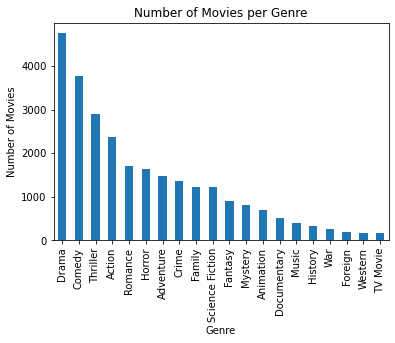

In [35]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
chart = df_genres['genres'].value_counts().plot.bar()
chart.set_xlabel('Genre')
chart.set_ylabel('Number of Movies')
chart.set_title('Number of Movies per Genre');

The genres that are most common in the database tend to be more general genres like drama and comedy, and the less common genres tend to be more specific. Now I will check the popularity of each genre

#### Chart Genres By Popularity

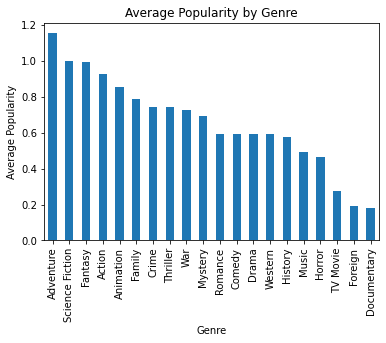

In [36]:
chart = df_genres.groupby('genres')['popularity'].mean().sort_values(ascending=False).plot.bar()
chart.set_title('Average Popularity by Genre')
chart.set_xlabel('Genre')
chart.set_ylabel('Average Popularity');

The genres that overall have the greatest average popularity are adventure, science fiction, and fantasy. Now I will look at the genres of the most popular movies.

#### Genres of Most Popular Movies

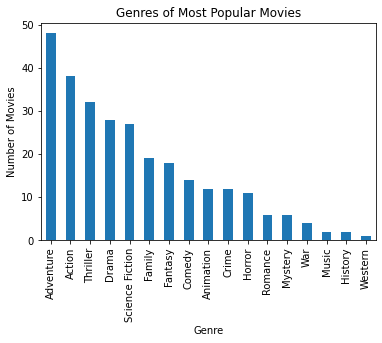

In [37]:
df_genre_popularity = df_genres.sort_values(['popularity'], ascending=False).groupby('release_year').head(5)
chart = df_genre_popularity['genres'].value_counts().plot.bar()
chart.set_title('Genres of Most Popular Movies')
chart.set_xlabel('Genre')
chart.set_ylabel('Number of Movies');

The genres of the most popular movies overall include action, adventure, and drama. Now I will look at the genres of the most popular recent movies

#### Genres of Recent Popular Movies

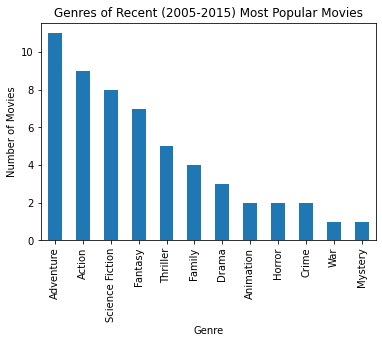

In [38]:
df_genre_recent = df_genre_popularity.query('release_year >= 2005')
chart = df_genre_recent['genres'].value_counts().plot.bar()
chart.set_title('Genres of Recent (2005-2015) Most Popular Movies')
chart.set_xlabel('Genre')
chart.set_ylabel('Number of Movies');

The genres of the most popular recent movies are action, adventure, and science fiction.

In [39]:
# count number of movies in database from after 2005
(df['release_year'] >= 2005).sum()

5802

### How is Running Time Trending Over Time?

#### Chart Distribution of Running Times
To answer this question, I will chart average running time for each year, as well as the maximum runtime for each year.

#### Chart Distribution of Runtimes

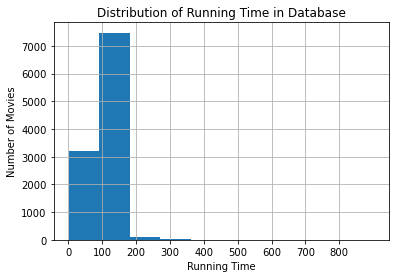

In [40]:
histogram = df['runtime'].hist()
histogram.set_xlabel('Running Time')
histogram.set_ylabel('Number of Movies')
histogram.set_xticks([0, 100, 200, 300, 400, 500, 600, 700, 800])
histogram.set_title('Distribution of Running Time in Database');

Most of the running times are less than 200 minutes, but there are some movies that are much longer.

Now I will chart average running time for each year, as well as the maximum runtime for each year.
#### Chart Average and Maximum Runtime by Year

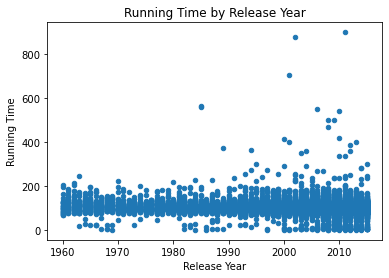

In [41]:
plot = df.plot.scatter(x='release_year',y='runtime')
plot.set_title('Running Time by Release Year')
plot.set_xlabel('Release Year')
plot.set_ylabel('Running Time');

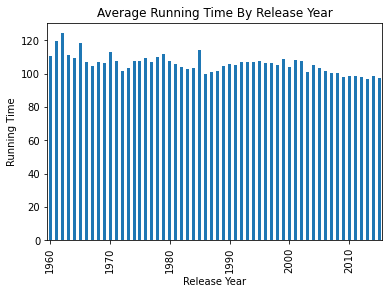

In [42]:
chart = df.groupby('release_year')['runtime'].mean().plot.bar()
plt.locator_params(axis='x', nbins=6)
chart.set_title('Average Running Time By Release Year')
chart.set_xlabel('Release Year')
chart.set_ylabel('Running Time');

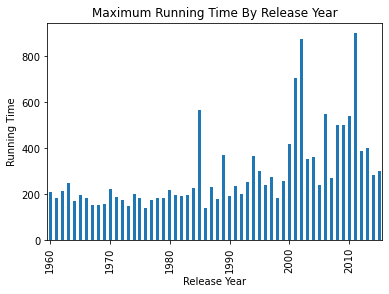

In [43]:
chart = df.groupby('release_year')['runtime'].max().plot.bar()
plt.locator_params(axis='x', nbins=6)
chart.set_title('Maximum Running Time By Release Year')
chart.set_xlabel('Release Year')
chart.set_ylabel('Running Time');

<a id='conclusions'></a>
## Conclusions

**Results:** Our data suggest that
1. The Science Fiction and Fantasy genres ahve gained popularity in recent years
2. Movie running times are generally decreasing over time
3. The longest movie running times are increasing over time

**Limitations:** There are a couple of limitations with our data:
1. Most of the movies in the database were released recently, so the genre comparison may not be representative of a change in genre preferences
2. The exploration of genre data is only comparing between the most popular movies, which may not represent overall trends
3. We cannot say that Science Fiction and Fantasy will gain popularity in the future.
4. I have not explored trends in genres over time for the whole database, just genres that are most popular in recent years.
5. As most of the movies were recently released, the apparent trend in average running time may not be representative.
6. We cannot predict that movie runtimes will generally decrease in the future, or that there will be more outliers that continue to increase in running time